### Step 1: Importing important libraries. *Numpy:* Linear Algebra and manipulation of data. *Keras:* High-level API built on top of Tensorflow. *SKLearn:* Machine Learning libraries that holds datasets, models and other useful functions.

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## *Problem statement: Given the dimensions of petal and sepal, can we predict the species of Iris?*
### Classification Problem: 3 Classes = Setosa, Versicolor and Virginica. Total number of samples: 150 (50 in each class). 

![alt text](https://thegoodpython.com/assets/images/iris-species.png)

### Step 2: Loading and visualizing the data.* Seaborn:* Data Visualization library built on top of Matplotlib
### **Class 0:** Setosa **Class 1:** Versicolor **Class 2:** Virginica

Example of iris_x = [5.1 3.5 1.4 0.2]
Example of iris_y = 0


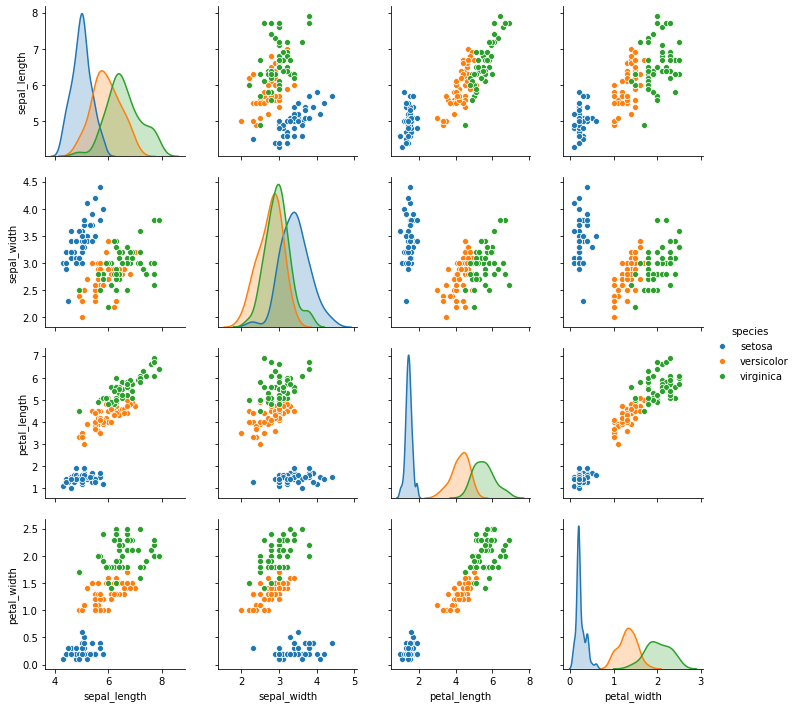

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
iris = load_iris()
iris_x = iris.data
iris_y = iris.target
#(Sepal Length, Sepal Width, Petal Length, Petal Width)in centimeters
print("Example of iris_x = {}".format(iris_x[0]))
#(Target Class)
print("Example of iris_y = {}".format(iris_y[0]))

sb.pairplot(sb.load_dataset("iris"),hue='species')

In [ ]:
#Converting class vector from row vector to column vector
print(iris_y.shape)
iris_y = iris_y.reshape(-1,1)
print(iris_y.shape)
print(iris_x.shape)

(150,)
(150, 1)
(150, 4)


### Step 3: Building the model






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer (Dense)                (None, 4)                 20        
_________________________________________________________________
HiddenLayer (Dense)          (None, 5)                 25        
_________________________________________________________________
Output (Dense)               (None, 3)                 18        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


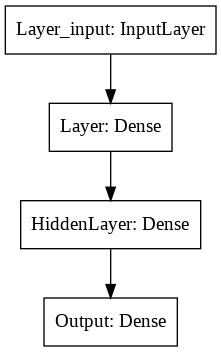

In [ ]:
#encoding the classes
iris_ye = OneHotEncoder(sparse=False).fit_transform(iris_y)
train_x,test_x,train_y,test_y = train_test_split(iris_x,iris_ye,test_size=0.2)

iris_m = Sequential()
iris_m.add(Dense(4,input_shape=(4,),activation='relu',name='Layer'))
iris_m.add(Dense(5,activation='relu',name='HiddenLayer'))
iris_m.add(Dense(3,activation='softmax',name='Output'))

iris_m.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

iris_m.summary()

keras.utils.plot_model(iris_m)

### Step 4: Training the model

In [ ]:
history = iris_m.fit(train_x,train_y,verbose=1,batch_size=5,epochs=500)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/500





120/120 [==============================] - 1s 8ms/step - loss: 1.8603 - acc: 0.3417
Epoch 2/500
120/120 [==============================] - 0s 259us/step - loss: 1.4386 - acc: 0.3417
Epoch 3/500
120/120 [==============================] - 0s 245us/step - loss: 1.1582 - acc: 0.3417
Epoch 4/500
120/120 [==============================] - 0s 242us/step - loss: 0.9870 - acc: 0.3500
Epoch 5/500
120/120 [==============================] - 0s 225us/step - loss: 0.8838 - acc: 0.4417
Epoch 6/500
120/120 [==============================] - 0s 354us/step - loss: 0.8310 - acc: 0.6500
Epoch 7/500
120/120 [==============================] - 0s 288us/step - loss: 0.8051 - acc: 0.6917
Epoch 8/500
120/120 [==============================] - 0s 231us/step - loss: 0.7906 - acc: 0.6917
Epoch 9/500
120/120 [==============================] - 0s 267us/step - loss: 0.7779 - acc: 0.6917
Epoch 10/500
120/1

Step 5: Evaluating the model on unseen data (Test set)

In [ ]:
results = iris_m.evaluate(test_x,test_y)

30/30 [==============================] - 0s 992us/step


In [ ]:
print('Test Loss = {}'.format(results[0]))
print('Test Accuracy = {}'.format(results[1]))

Test Loss = 0.018710220232605934
Test Accuracy = 1.0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred_y = iris_m.predict(test_x)
pred_yl = np.argmax(pred_y,axis=1)
test_yl = np.argmax(test_y,axis=1)
print(classification_report(test_yl,pred_yl))
print(confusion_matrix(test_yl,pred_yl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


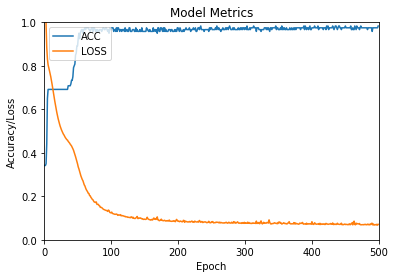

In [ ]:
plt.xlim(0,500)
plt.ylim(0.0,1.0)
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Metrics')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['ACC', 'LOSS'], loc='upper left')
plt.show()
